In [3]:
from scipy.stats import uniform
import seaborn as sns

In [2]:
dados_uniform = uniform.rvs(size=1000)

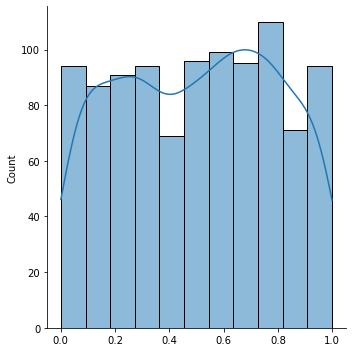

In [13]:
sns.displot(dados_uniform, kde=True);

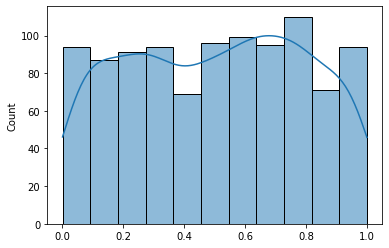

In [14]:
sns.histplot(dados_uniform, kde=True);

In [15]:
min(dados_uniform), max(dados_uniform)

(0.00025930259700690517, 0.9993732067098078)

In [17]:
import numpy as np

In [19]:
np.unique(dados_uniform, return_counts=True)

(array([2.59302597e-04, 1.67123937e-03, 3.88493179e-03, 5.69776185e-03,
        9.94285665e-03, 1.25599451e-02, 1.40220391e-02, 1.47971830e-02,
        1.59219920e-02, 1.83074848e-02, 2.02600639e-02, 2.16376903e-02,
        2.16643361e-02, 2.17578229e-02, 2.23300554e-02, 2.25797398e-02,
        2.31916873e-02, 2.34747914e-02, 2.45813078e-02, 2.51399344e-02,
        2.52629577e-02, 2.55464446e-02, 2.57233767e-02, 2.58755060e-02,
        2.58862256e-02, 2.64973927e-02, 2.74029948e-02, 2.98840343e-02,
        3.02029339e-02, 3.09295417e-02, 3.41907778e-02, 3.48563254e-02,
        3.59464834e-02, 3.63121682e-02, 3.63786344e-02, 3.81095818e-02,
        3.91093184e-02, 4.03815820e-02, 4.04521105e-02, 4.12511188e-02,
        4.17659620e-02, 4.30610748e-02, 4.32989464e-02, 4.34329695e-02,
        4.48767833e-02, 4.61684125e-02, 4.67419560e-02, 4.71338746e-02,
        4.77135493e-02, 4.77491249e-02, 4.83250338e-02, 4.88131705e-02,
        4.95458453e-02, 5.13223620e-02, 5.28036216e-02, 5.611001

In [20]:
import pandas as pd

In [25]:
df = pd.read_csv('../bases_dados/credit_data.csv')

In [26]:
df.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [27]:
df.isnull().sum()

i#clientid    0
income        0
age           3
loan          0
c#default     0
dtype: int64

In [28]:
df.dropna(inplace=True)

In [29]:
df.shape

(1997, 5)

In [30]:
x = df.iloc[:, 1:4].values

In [31]:
y = df.iloc[:, 4].values

In [32]:
x

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [33]:
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
resultados_naive = []

for i in range(30):
    x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, stratify=y, random_state=i)
    
    naive_bayes = GaussianNB()
    naive_bayes.fit(x_treino, y_treino)
    resultados_naive.append(accuracy_score(naive_bayes.predict(x_teste), y_teste))

In [40]:
len(resultados_naive)

30

In [39]:
print(resultados_naive)

[0.925, 0.925, 0.9325, 0.925, 0.92, 0.905, 0.9175, 0.9175, 0.9125, 0.9325, 0.9225, 0.9125, 0.935, 0.9175, 0.925, 0.9175, 0.9275, 0.92, 0.9325, 0.92, 0.93, 0.905, 0.9175, 0.9325, 0.9425, 0.9375, 0.94, 0.92, 0.935, 0.925]


In [41]:
min(resultados_naive), max(resultados_naive)

(0.905, 0.9425)

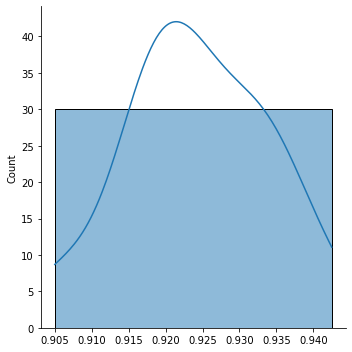

In [45]:
sns.displot(resultados_naive, bins=1, kde=True);